# 7. 데이터 분석 Data Analysis

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ----------------------------- -------- 122.9/160.4 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.5 MB 14.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.5 MB 12.7 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.5 MB 12.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.5 MB 12.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.5 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.5 MB 11.8 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.5 MB 12.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.6/7.5 MB 12.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.3/7.5 MB 12.0 MB/s eta 0:00:01
   --

## 7-a. 토큰 분포 확인하기

### 7-a-1. 데이터 불러오기

In [15]:
import pandas as pd

# 데이터를 불러옵니다.
data = pd.read_csv('1_normalized_ecopro_text.csv', encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   community       108945 non-null  object
 1   gall_id         108945 non-null  object
 2   search_keyword  108945 non-null  object
 3   number          108945 non-null  int64 
 4   date_created    108945 non-null  object
 5   time_created    108945 non-null  object
 6   author          108945 non-null  object
 7   is_reply        108945 non-null  int64 
 8   text_length     108945 non-null  int64 
 9   spaced_text     108945 non-null  object
 10  tokens          108945 non-null  object
dtypes: int64(3), object(8)
memory usage: 9.1+ MB


In [16]:
data.head(3)

,community,gall_id,search_keyword,number,date_created,time_created,author,is_reply,text_length,spaced_text,tokens
0,dcinside,snp500,에코,832014,2023-10-27,15:50:34,ㅇㅇ(58.78),0,56,국연 에코프로 퍼이상 투자해야한다 전국민 자산증발에 앞서야 추후 글로벌 시장에 조선...,"['국연', '에코프로', '이상', '투자', '국민', '자산', '증발', '..."
1,dcinside,snp500,에코,831598,2023-10-26,21:13:32,슨붕이(106.101),0,11,에코푸로 손절 ㄷㄷㄷ,"['에코프로', '손절', 'ㄷㄷㄷ']"
2,dcinside,snp500,에코,831598,2023-10-26,21:14:04,모든주식을소유하라,1,9,알빠노? 캬ㅋㅋㅋ,"['알빠노', '?', '캬ㅋㅋㅋ']"


### 7-a-2. 'tokens' 열의 데이터를 리스트로 처리

In [7]:
import ast
# 'tokens' 열의 데이터를 리스트로 처리합니다. (이미 리스트인 경우 이 단계는 생략)
data['tokens'] = data['tokens'].apply(ast.literal_eval)

### 7-a-3. 한글 폰트 설정 : matplotlib 에서 한글이 깨지지 않도록 

In [14]:
# 한글 폰트 설정
# matplotlib 에서 한글이 깨지지 않도록 한다

import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

### 7-a-4. 토큰 분포 출력

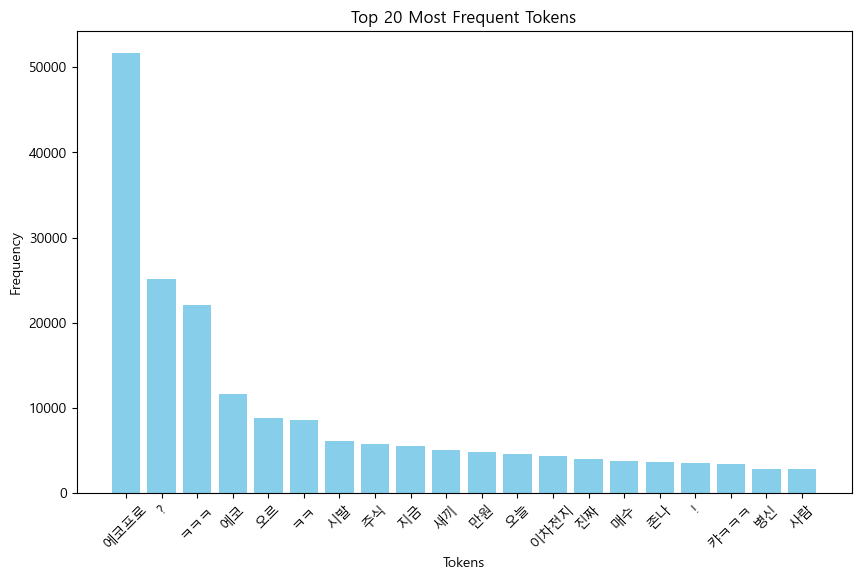

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# 모든 토큰을 하나의 리스트로 결합합니다.
all_tokens = [token for tokens_list in data['tokens'] for token in tokens_list]

# 토큰의 빈도수를 계산합니다.
token_counts = Counter(all_tokens)

# 가장 많이 등장한 토큰 상위 20개를 추출합니다.
top_tokens = token_counts.most_common(20)

# 시각화합니다.
plt.figure(figsize=(10, 6))
plt.bar([token[0] for token in top_tokens], [token[1] for token in top_tokens], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Tokens')
plt.show()


## 7-b. df 의 칼럼 가공하기 

### 7-b-1. 주식 장시간 고려하여 날짜 칼럼 새로 만들기
- 09:00:00 에 장이 열리므로, 이 시간을 하루의 시작으로 한다
- 익일 08:59:59 이 하루의 끝이다 

In [22]:
# 'date_created'와 'time_created' 열을 합쳐서 datetime 객체로 변환합니다.
data['datetime'] = pd.to_datetime(data['date_created'] + ' ' + data['time_created'])

# 새로운 'date' 열을 만들기 위한 함수 정의
def assign_date(row):
    if row.hour < 9:
        # 09:00 이전인 경우 하루를 뺍니다.
        return row - pd.Timedelta(days=1)
    return row

# 'datetime' 열을 사용하여 'date' 열을 생성합니다.
data['date'] = data['datetime'].apply(assign_date).dt.date

# 결과 확인
data.head(50)

,community,gall_id,search_keyword,number,date_created,time_created,author,is_reply,text_length,spaced_text,tokens,datetime,date
0,dcinside,snp500,에코,832014,2023-10-27,15:50:34,ㅇㅇ(58.78),0,56,국연 에코프로 퍼이상 투자해야한다 전국민 자산증발에 앞서야 추후 글로벌 시장에 조선...,"['국연', '에코프로', '이상', '투자', '국민', '자산', '증발', '...",2023-10-27 15:50:34,2023-10-27
1,dcinside,snp500,에코,831598,2023-10-26,21:13:32,슨붕이(106.101),0,11,에코푸로 손절 ㄷㄷㄷ,"['에코프로', '손절', 'ㄷㄷㄷ']",2023-10-26 21:13:32,2023-10-26
2,dcinside,snp500,에코,831598,2023-10-26,21:14:04,모든주식을소유하라,1,9,알빠노? 캬ㅋㅋㅋ,"['알빠노', '?', '캬ㅋㅋㅋ']",2023-10-26 21:14:04,2023-10-26
3,dcinside,snp500,에코,831598,2023-10-26,21:15:57,ㅇㅇ,1,23,그냥업황나빠진건데사ㅇㅈㄹ잘못ㅇㅈㅈㅓ대안ㅋㅋ,"['그냥', '황나', '빠진', '건데', 'ㅇㅈㄹ', '잘못']",2023-10-26 21:15:57,2023-10-26
4,dcinside,snp500,에코,831598,2023-10-26,21:22:49,ㅇㅇ,1,20,오근디돈 억넘게 에코프로에박앗네상남ㅇㅂ,"['근디', '에코프로', '상남']",2023-10-26 21:22:49,2023-10-26
5,dcinside,snp500,에코,831560,2023-10-26,20:17:39,ㅇㅇ,0,20,에코프로 마십쩌둥 머임 먼일이 난거임,"['에코프로', '마십']",2023-10-26 20:17:39,2023-10-26
6,dcinside,snp500,에코,831560,2023-10-26,20:20:36,슨피한접시,1,6,평범한 국장,['국장'],2023-10-26 20:20:36,2023-10-26
7,dcinside,snp500,에코,831459,2023-10-26,17:04:31,원화=휴지/달러=신,0,117,에코프로는 진지하게 주당 만원이 적정가임 현재 모든 지표와 기대감까지 종합해봤을때 ...,"['에코프로', '적정', '가임', '현재', '모든', '지표', '기대감', ...",2023-10-26 17:04:31,2023-10-26
8,dcinside,snp500,에코,831459,2023-10-26,17:05:41,ㅇㅇ(58.78),1,40,코리안 디스카운트 반영해서 원정도가 적정가다 만원이면 나스닥 상장해야한다,"['코리안', '디스카운트', '반영', '정도', '적정', '만원', '나스닥'...",2023-10-26 17:05:41,2023-10-26
9,dcinside,snp500,에코,831459,2023-10-26,17:06:29,돌려돌려돌림판,1,23,원이 적정가임 내가 보유하지 않았기 때문에,"['적정', '가임', '보유', '때문']",2023-10-26 17:06:29,2023-10-26


### 1-b-2. 결과 확인
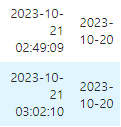

- 실제 날짜는 10월21일 임에도 아직 새벽(02:49)이므로 10월20일로 date 가 정해진 것을 볼 수 있다

### 1-b-3. 불필요한 칼럼 삭제

In [23]:
# 불필요한 열 삭제
data.drop(['community', 'search_keyword', 'text_length', 'date_created', 'time_created'], axis=1, inplace=True)
data.head(3)

,gall_id,number,author,is_reply,spaced_text,tokens,datetime,date
0,snp500,832014,ㅇㅇ(58.78),0,국연 에코프로 퍼이상 투자해야한다 전국민 자산증발에 앞서야 추후 글로벌 시장에 조선...,"['국연', '에코프로', '이상', '투자', '국민', '자산', '증발', '...",2023-10-27 15:50:34,2023-10-27
1,snp500,831598,슨붕이(106.101),0,에코푸로 손절 ㄷㄷㄷ,"['에코프로', '손절', 'ㄷㄷㄷ']",2023-10-26 21:13:32,2023-10-26
2,snp500,831598,모든주식을소유하라,1,알빠노? 캬ㅋㅋㅋ,"['알빠노', '?', '캬ㅋㅋㅋ']",2023-10-26 21:14:04,2023-10-26
